In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
data=pd.read_csv(r'C:\Users\satyam\Desktop\project\project 2\raw.githubusercontent.com_dsrscientist_DSData_master_happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
data.isna().sum()  #checking null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
#from above we observation that there is null values in data set

In [6]:
data.info() # check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
 # removing unwanted column bcz this column not contribute in predict the Happiness Scor
data=data.drop(columns=['Happiness Rank']) 

In [8]:
# Happiness Rank is intiger data
# country,region, are object data
# remaining s are float data

In [9]:
for i in data.columns:
    print(data[i].value_counts())  # cheking all counts 
    print('\n')

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int6

In [10]:
#separting numerical and categorical values
# for categorical
categorical=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical.append(i)
print('categorical=',categorical)
print('\n')
# for numerical
numerical=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical.append(i)
print('numerical=',numerical)


categorical= ['Country', 'Region']


numerical= ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [11]:
numerical

['Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [12]:
data.nunique().to_frame('no of unique value') # ckeking unique values in all columns

,no of unique value
Country,158
Region,10
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157
Generosity,158


In [13]:
data.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [14]:
# from above row count is same in all column mens no null value
# in all column big diffrence in mean and std deviation
# maen and 50% are almost same that mean it is normal distribution (bell shape)
# looks like there is SOME skewness in data 
# looks like there is some  outliers

# data visulization

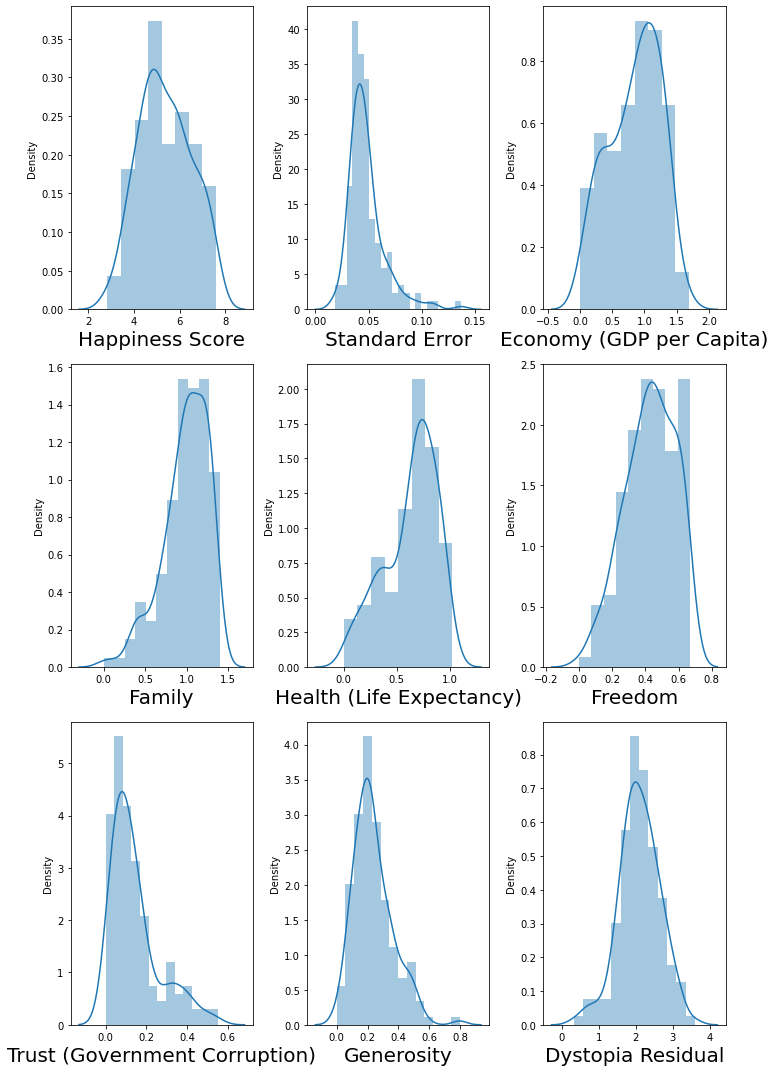

In [15]:
#cheking ditribution of plot
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

In [16]:
# from the above in column Standard Error,Family, Trust (Government Corruption),Generosity,skewness has been observed

In [17]:
data.skew() #cheking skewness

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

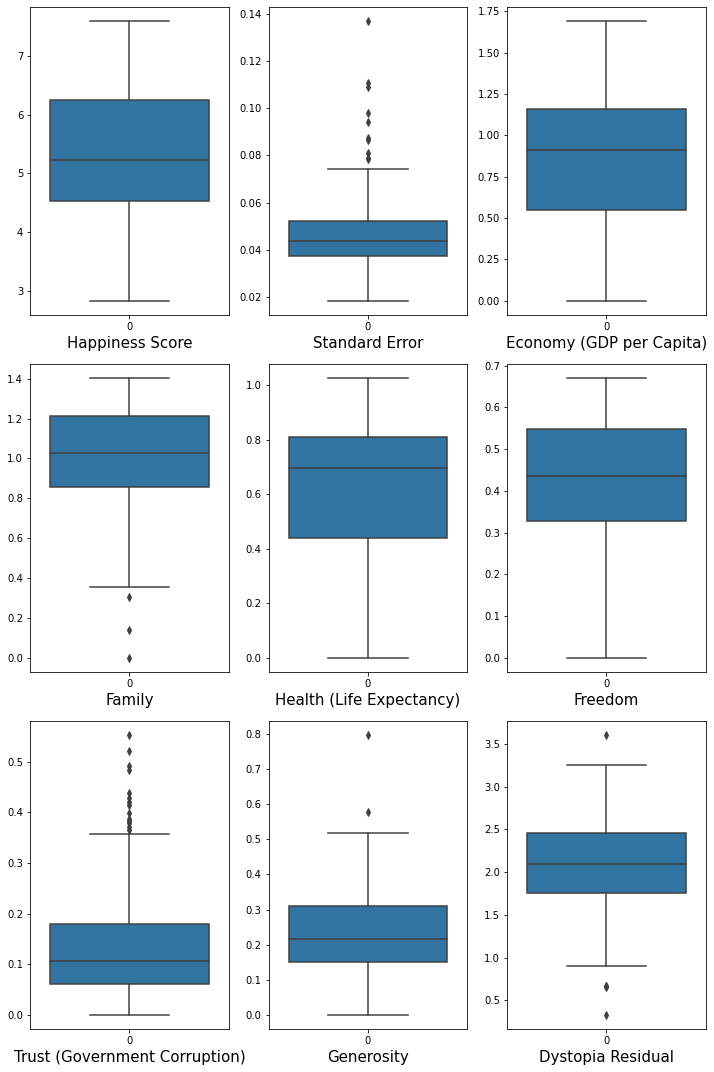

In [18]:
#cheking  for outlier 
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)

    plotnumber+=1
plt.tight_layout()    

In [19]:
# from the above feature like Standard Error,Family,Trust (Government Corruption),Generosity,Dystopia Residual outlier has been present

# removing outlies

In [20]:
#1st qantile
q1=data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)
iqr=q3-q1

In [21]:
iqr

Happiness Score                  1.717750
Standard Error                   0.015032
Economy (GDP per Capita)         0.612640
Family                           0.357582
Health (Life Expectancy)         0.371828
Freedom                          0.220762
Trust (Government Corruption)    0.118580
Generosity                       0.159330
Dystopia Residual                0.703005
dtype: float64

In [22]:
#same for all deleting outlier
Standard_Error_high=(q3['Standard Error'] +(1.5*iqr['Standard Error']))
print(Standard_Error_high)
a=np.where(data['Standard Error']>Standard_Error_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

0.07484874999999999
(148, 11)


,index,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
143,152,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
144,153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
145,154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
146,155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [23]:
#same for all deleting outlier
Trust_high=(q3['Trust (Government Corruption)'] +(1.5*iqr['Trust (Government Corruption)']))
print(Trust_high)
a=np.where(data['Trust (Government Corruption)']>Trust_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

0.35812499999999997
(134, 11)


,index,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,Israel,Middle East and Northern Africa,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...
129,151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
130,152,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
131,154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
132,155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [24]:
#same for all deleting outlier
Generosity_high=(q3['Generosity'] +(1.5*iqr['Generosity']))
print(Generosity_high)
a=np.where(data['Generosity']>Generosity_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

0.5488775
(132, 11)


,index,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,Israel,Middle East and Northern Africa,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...
127,151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
128,152,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
129,154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
130,155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [25]:
#same for all deleting outlier
Dystopia_Residual_high=(q3['Dystopia Residual'] +(1.5*iqr['Dystopia Residual']))
print(Dystopia_Residual_high)
a=np.where(data['Dystopia Residual']>Dystopia_Residual_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

3.5169225
(131, 11)


,index,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,Israel,Middle East and Northern Africa,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...
126,151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
127,152,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
128,154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
129,155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [26]:
# here we use lower side to delete the outlier
Family_low=(q1['Family'] -(1.5*iqr['Family']))
print(Family_low)
a=np.where(data['Family']<Family_low)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

0.32044875000000017
(128, 11)


,index,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,Israel,Middle East and Northern Africa,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...
123,149,Guinea,Sub-Saharan Africa,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
124,150,Ivory Coast,Sub-Saharan Africa,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
125,151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
126,154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [27]:
# here we use lower side to delete the outlier
Dystopia_Residualy_low=(q1['Dystopia Residual'] -(1.5*iqr['Dystopia Residual']))
print(Dystopia_Residualy_low)
a=np.where(data['Dystopia Residual']<Dystopia_Residualy_low)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

0.7049024999999998
(126, 11)


,index,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,Israel,Middle East and Northern Africa,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...
121,148,Chad,Sub-Saharan Africa,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
122,149,Guinea,Sub-Saharan Africa,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
123,150,Ivory Coast,Sub-Saharan Africa,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
124,151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


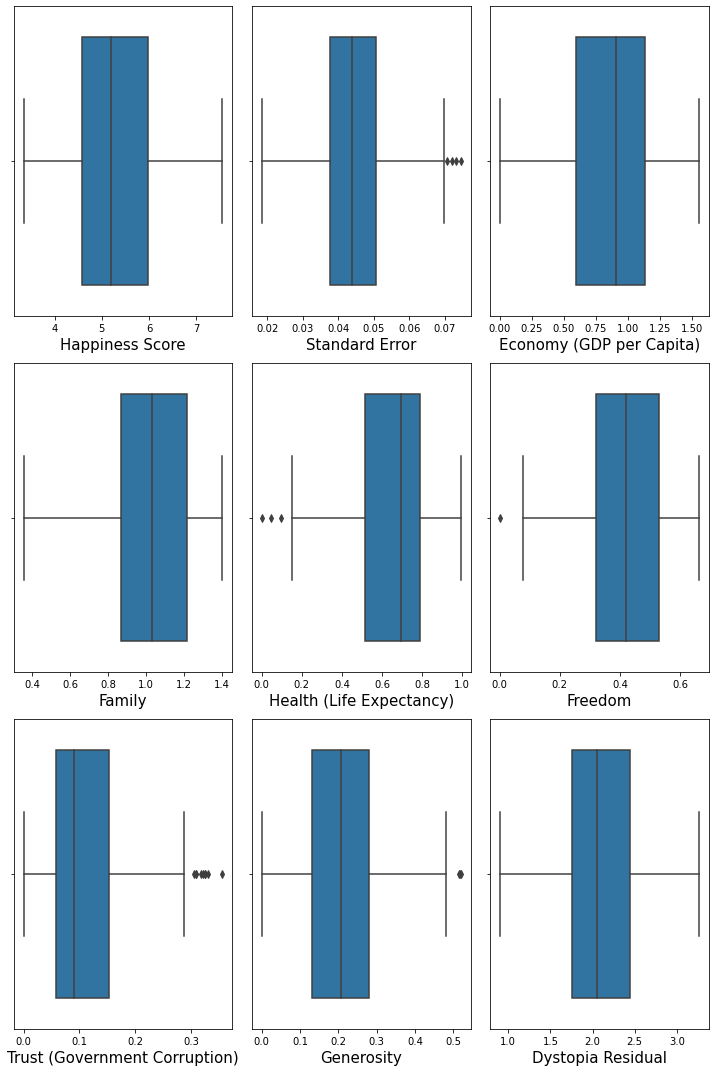

In [28]:
#cheking all outlier removed or not
#cheking  for outlier 
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)

    plotnumber+=1
plt.tight_layout()    

In [29]:
#some outlier has been removed this process we have to done by only one time

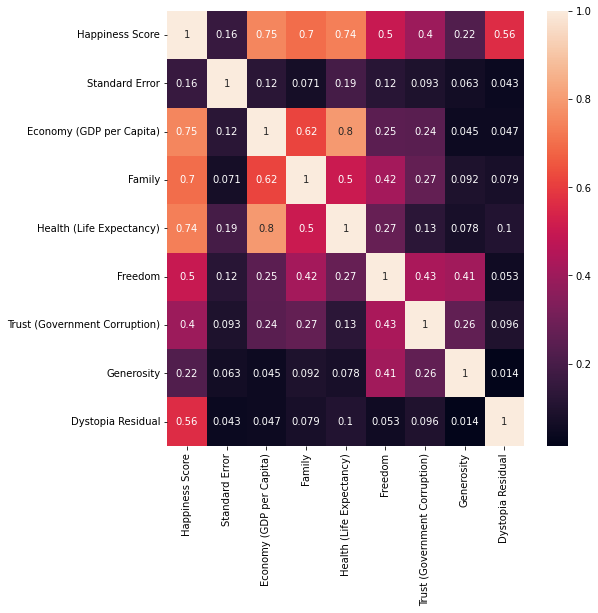

In [30]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(8,8))
sns.heatmap(relation,annot=True)
plt.show()

In [31]:
# from above plot health(life expectancy) is highly realted to econopy(GDP per capital) check for multicolinarity issue.
# there health(life expectancy),family,econopy(GDP per capital) are highly relate with target 
# standard error is les related to label.

In [32]:
relation['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.752534
Health (Life Expectancy)         0.736381
Family                           0.696713
Dystopia Residual                0.562964
Freedom                          0.496880
Trust (Government Corruption)    0.395694
Generosity                       0.221986
Standard Error                   0.157193
Name: Happiness Score, dtype: float64

In [33]:
# Economy (GDP per Capita)  is highly related to label.(75%)

# Encoding categorical data

In [34]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))
data

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,50.0,9.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,22.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,83.0,9.0,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
9,5.0,0.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
10,56.0,4.0,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...
148,23.0,8.0,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,46.0,8.0,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,58.0,8.0,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,19.0,8.0,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [35]:
x=data.drop(columns=['Happiness Score']) #Region,and country are object data
y=data['Happiness Score']

In [36]:
x #check separete or not (label)

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,50.0,9.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,22.0,5.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,83.0,9.0,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
9,5.0,0.0,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
10,56.0,4.0,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...
148,23.0,8.0,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,46.0,8.0,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,58.0,8.0,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,19.0,8.0,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


# EDA PROCESSING IS COMPLETED¶

In [37]:
#for scalling features to remove baisness 
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# model buildings

In [38]:
# trainning and spliting data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=202)

In [39]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [40]:
#predicting(the result) on test data or Happiness Score
y_pred=reg.predict(x_test)
y_pred

array([4.29245962, 4.95946553, 7.56086656, 6.81034388, 3.78074971,
       4.03312623, 4.51717136, 4.68546948, 5.42862161, 3.99484904,
       4.50727552, 4.19424688, 4.55066632, 7.22579693, 4.73847907,
       5.28639494, 3.65581329, 4.85761972, 6.98271262, 5.94816286,
       5.4770105 , 4.87596414, 3.9036528 , 3.95571236, 5.39858889,
       4.21857705, 4.78800994, 3.68081246, 6.47691024, 5.75868814,
       6.57500788, 5.97529261])

# testing model

In [41]:
data.tail(2)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
151,19.0,8.0,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
154,12.0,8.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [42]:
#since we have already fit ,now we have only to transform data
print('Happiness Score: ',reg.predict(scalar.transform([[12.0,8.0,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328]]))) 

Happiness Score:  [3.33991632]


In [43]:
#predicting(the result) on test data or outcome
y_pred=reg.predict(x_test)
y_pred

array([4.29245962, 4.95946553, 7.56086656, 6.81034388, 3.78074971,
       4.03312623, 4.51717136, 4.68546948, 5.42862161, 3.99484904,
       4.50727552, 4.19424688, 4.55066632, 7.22579693, 4.73847907,
       5.28639494, 3.65581329, 4.85761972, 6.98271262, 5.94816286,
       5.4770105 , 4.87596414, 3.9036528 , 3.95571236, 5.39858889,
       4.21857705, 4.78800994, 3.68081246, 6.47691024, 5.75868814,
       6.57500788, 5.97529261])

In [44]:
reg.score(x_train,y_train) # how much it understood on training data

0.9999999348564597

In [46]:
#how model fit on test data
reg.score(x_test,y_test)

0.9999999047847625

In [ ]:
#visulizing how model is good
plt.scatter(y_test,y_pred)
plt.xlabel('Actuall ')
plt.ylabel('prediction')
plt.title('actual vas predicted')

In [ ]:
LOOKS like model is overfited ,lets avoid this using lasso regression

In [ ]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [ ]:
#lassocv will return best alpha after max iteration
# normalize is subtracting the mean and dividing by the l2-norm
lassocv=LassoCV(alphas=None,max_iter=15,normalize=True)
lassocv.fit(x_train,y_train)

In [ ]:
# BEST alpha parameter
alpha=lassocv.alpha_  # best learning rate
alpha

In [ ]:
lasso_reg=Lasso(alpha)  # providing model learning rate
lasso_reg.fit(x_train,y_train)

In [ ]:
lasso_reg.score(x_test,y_test) 

# NO Our Linear Model not Overfitted and our model accuracy is 99%